# Problem Statement

### Background  
X Education is an online education company that offers courses to industry professionals. The company markets its courses through various platforms, including websites, search engines like Google, and referrals. Professionals interested in the courses often visit the website, where they may browse offerings, fill out inquiry forms, or watch promotional videos. When a visitor provides their email address or phone number by filling out a form, they become classified as a **lead**. The sales team then engages with these leads through calls, emails, and other forms of communication to convert them into paying customers.  

Currently, X Education's **lead conversion rate** is only **30%**, meaning that out of every 100 leads acquired, only about 30 are successfully converted into customers. This low conversion rate results in a significant amount of time and resources being spent on leads with low potential, while promising leads might not receive adequate attention.  

### Business Problem  
To improve the efficiency of their sales process and maximize conversions, X Education aims to identify the most promising leads, referred to as **"Hot Leads"**. By targeting these high-potential leads, the company intends to prioritize their sales efforts and enhance their conversion rate to **80%**, a significant improvement over the current rate.  

The lead conversion process can be visualized as a funnel:  
1. A large number of leads are generated at the top (initial stage).  
2. Leads are nurtured and engaged during the middle stage (via communication and education).  
3. Only a small number convert into paying customers at the bottom.  

The company’s primary challenge is to focus on the middle stage by identifying and nurturing the most promising leads, thus reducing wasted effort on leads unlikely to convert.

### Objective  
The primary objective of this analysis is to develop a **predictive model** to assign a **Lead Score** (between 0 and 100) to each lead based on their likelihood of conversion. A higher score would indicate a lead is "hot" (high conversion potential), while a lower score would indicate a "cold" lead (low conversion potential).  

The deliverables for this project include:  
1. A **logistic regression model** to predict lead Conversion_Probability.  
2. **Insights and recommendations** to address additional business challenges, ensuring the model is flexible for future needs.  
3. Clear **visualizations** and evaluation metrics to explain model performance and results.  
4. A structured **presentation** summarizing findings in business terms, supported by data.  
5. A **summary report** (500 words) explaining the approach, analysis, and key takeaways.  

### Dataset Overview  
The dataset contains around **9,000 leads**, with various features such as:  
- `Lead Source`  
- `Total Time Spent on Website`  
- `Total Visits`  
- `Last Activity`  

The target variable is `Converted`, where:  
- `1` indicates the lead was converted.  
- `0` indicates the lead was not converted.  

Some features have levels such as 'Select,' which represent missing or null values and need to be handled appropriately during data preprocessing.  

### Expected Outcome  
By building the predictive model, X Education seeks to:  
1. Focus its sales efforts on high-potential leads, leading to more effective resource allocation.  
2. Increase the overall lead conversion rate to the target of **80%**.  
3. Gain actionable insights into the key factors influencing lead conversion.  

This solution will enable the company to streamline its lead nurturing process, ultimately increasing profitability and efficiency.

---

# 1. Setting up Notebook and Loading the Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc

In [2]:
# Setting up notebook view options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
# Reading the dataset
df = pd.read_csv('Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0        0.000   
1  Organic Search           No          No          0        5.000   
2  Direct Traffic           No          No          1        2.000   
3  Direct Traffic           No          No          0        1.000   
4          Google           No          No          1        2.000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                 0.000  Page Visited on Website   
1                          674                 2.500             Email Opened   
2                         1532                 2.000             Email Opened   
3                          305                 1.000              Unreachable   
4                         1428                 1.000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# 2. DataSet Check

In [4]:
total_cols = df.shape[1]
print('Number of Columns: ', total_cols)
df.shape

Number of Columns:  37


(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count     9240.000   9240.000     9103.000                     9240.000   
mean    617188.436      0.385        3.445                      487.698   
std      23405.996      0.487        4.855                      548.021   
min     579533.000      0.000        0.000                        0.000   
25%     596484.500      0.000        1.000                       12.000   
50%     615479.000      0.000        3.000                      248.000   
75%     637387.250      1.000        5.000                      936.000   
max     660737.000      1.000      251.000                     2272.000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count              9103.000                     5022.000   
mean                  2.363                       14.306   
std                   2.161                        1.387   
min                   0.000                        7.000   
25%                   1.000                       14.000   
50%                   2.000                       14.000   
75%                   3.000                       15.000   
max                  55.000                       18.000   

       Asymmetrique Profile Score  
count                    5022.000  
mean                       16.345  
std                         1.811  
min                        11.000  
25%                        15.000  
50%                        16.000  
75%                        18.000  
max                        20.000

# 3. Data Preprocessing

## 3.1 `Select` - Replacing with 'Unknown'
- `Select` seems to be erroneously captured in the data collection process despite not being a valid data point.
- We can replace this with 'Unknown'

In [7]:
# Replacing 'Select' with NaN in the entire DataFrame
df = df.replace('Select', 'Unknown')

## 3.2 Null Check - Dropping High Null Columns

In [8]:
(df.isnull().mean()*100).sort_values(ascending=False)

Lead Quality                                    51.591
Asymmetrique Activity Index                     45.649
Asymmetrique Profile Score                      45.649
Asymmetrique Activity Score                     45.649
Asymmetrique Profile Index                      45.649
Tags                                            36.288
Lead Profile                                    29.318
What matters most to you in choosing a course   29.318
What is your current occupation                 29.113
Country                                         26.634
How did you hear about X Education              23.885
Specialization                                  15.563
City                                            15.368
Page Views Per Visit                             1.483
TotalVisits                                      1.483
Last Activity                                    1.115
Lead Source                                      0.390
Receive More Updates About Our Courses           0.000
I agree to

---
- Some columns have extremely high Null %.
- We will set a threshold of 30% Nulls as acceptable and try to impute, the columns with higher Null % will be dropped.

### 3.2.1 Drop Columns with Null % > 30
- Keep `Tags` columns since it could have important information

In [9]:
# Only keeping columns with Null % below 30
df = df.loc[:, (df.isnull().mean() * 100 < 30) | (df.columns == 'Tags')]

### 3.2.2 Drop Rows where column `Tags` is empty
- Tags - column gives us some important insight on the type of lead from initial contact to sales progress pipeline.
- Any rows missing this info might not be able to contribute significantly, so we can drop those rows

In [10]:
# Drop Rows where column `Tags` is empty
df = df[~pd.isnull(df['Tags'])]

In [11]:
# Checking for remaining null values and their proportions
null_cols = df.isnull().mean() * 100
null_cols[null_cols > 0].sort_values(ascending=False)

Country                                         21.777
TotalVisits                                      1.987
Page Views Per Visit                             1.987
Last Activity                                    1.597
What is your current occupation                  1.376
What matters most to you in choosing a course    1.376
Lead Profile                                     1.376
How did you hear about X Education               1.155
City                                             0.612
Specialization                                   0.578
Lead Source                                      0.425
dtype: float64

In [12]:
# Dataframe shape after dropping High Null Columns
cols_dropped = total_cols - df.shape[1]
print('Number of columns dropped: ', cols_dropped)
df.shape

Number of columns dropped:  5


(5887, 32)

In [13]:
# Checking for duplicates
df.duplicated().sum()

0

## 3.3 Dropping Identifier Columns until later

In [14]:
df.drop(['Prospect ID'], axis=1, inplace=True)

## 3.4 Dropping Categorical Columns with Extreme Skewness of Sub-Categories

In [15]:
# Separating numerical and categorical columns
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns]
categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns]

In [ ]:
# Prepare a list to store columns to drop
cols_to_drop = []
print(f"Category Columns with Skewed Distribution of sub-categories or single values only:\n")

for col in categorical_cols:
    value_counts = df[col].value_counts(normalize=True)*100
    
    # Check if the column has only one unique value or a significant imbalance
    if len(value_counts) == 1 or value_counts.iloc[0] > 90:
        print(value_counts)
        print(f"{'-' * 50}\n")
        cols_to_drop.append(col)

categorical_cols = [col for col in categorical_cols if col not in cols_to_drop]

cols_to_drop


Category Columns with Skewed Distribution of sub-categories or single values only:

Do Not Email
No    93.307
Yes    6.693
Name: proportion, dtype: float64
--------------------------------------------------

Do Not Call
No    99.966
Yes    0.034
Name: proportion, dtype: float64
--------------------------------------------------

Country
India                  95.809
United States           0.934
United Arab Emirates    0.825
Singapore               0.347
Saudi Arabia            0.347
United Kingdom          0.239
Australia               0.195
Qatar                   0.174
Hong Kong               0.130
Oman                    0.109
Bahrain                 0.109
France                  0.109
South Africa            0.065
Nigeria                 0.065
Kuwait                  0.065
Netherlands             0.043
Canada                  0.043
Germany                 0.043
Uganda                  0.043
Philippines             0.043
Italy                   0.022
Indonesia               0.022
V

['Do Not Email',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [17]:
# Dataframe after dropping Highly Skewed Columns
df = df.drop(columns=cols_to_drop)
print('Number of columns dropped: ', len(cols_to_drop))

df.shape

Number of columns dropped:  15


(5887, 16)

In [18]:
numerical_cols

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [19]:
categorical_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

## 3.5 Imputing Nulls

### Impute numerical and categorical columns with median and mode respectively

In [20]:
# Fill missing values for numerical columns with median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [21]:
# Fill missing values for categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [22]:
df.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0        0.000                            0                 0.000   
1        5.000                          674                 2.500   
2        2.000                         1532                 2.000   
3        1.000                          305                 1.000   
4        2.000                         1428                 1.000   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  How did you hear about X Education What is your current occupation  \
0                            Unknown                      Unemployed   
1                            Unknown                      Unemployed   
2                            Unknown                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                                  Tags    Lead Profile     City  \
0          Interested in other courses         Unknown  Unknown   
1                              Ringing         Unknown  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing         Unknown   Mumbai   
4  Will revert after reading the email         Unknown   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [23]:
# Verifying if any nulls left
df.isnull().sum().sum()

0

## 3.6 Capping Outliers

In [24]:
import math

def udf_plot_boxplots(df, num_cols, cols=3, figsize=(10, 6)):
    """
    Plots boxplots for the given numerical columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    num_cols (list): List of numerical column names to plot.
    cols (int): Number of columns for subplots (default is 4).
    figsize (tuple): Figure size (default is (10, 4)).
    """
    # Calculating the number of rows needed for subplots
    rows = math.ceil(len(num_cols) / cols)

    # Creating the figure
    fig = plt.figure(figsize=figsize)

    for i, col in enumerate(num_cols):
        ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(f'{col}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

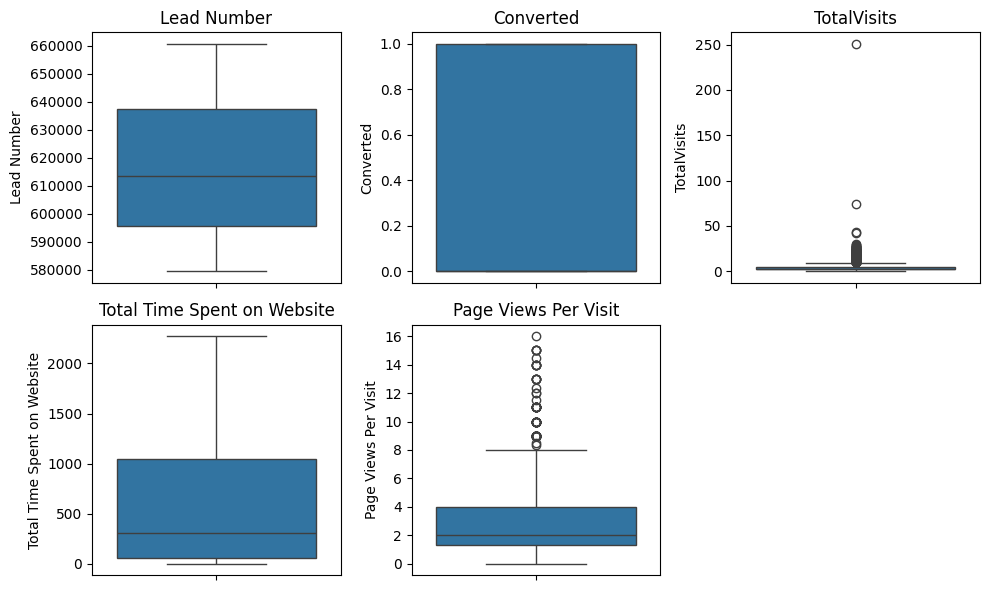

In [25]:
udf_plot_boxplots(df, num_cols=numerical_cols, cols=3)

In [26]:
for col in numerical_cols:
    
    lower_quantile=0.25
    upper_quantile=0.75
    iqr_multiplier=1.5

    Q1 = df[col].quantile(lower_quantile)
    Q3 = df[col].quantile(upper_quantile)
            
    IQR = Q3 - Q1   # Calculate the Interquartile Range (IQR)
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    # Filter out rows with values outside the bounds
    df[col] = np.clip(df[col], lower_bound, upper_bound)

- Checking if outliers are successfully removed

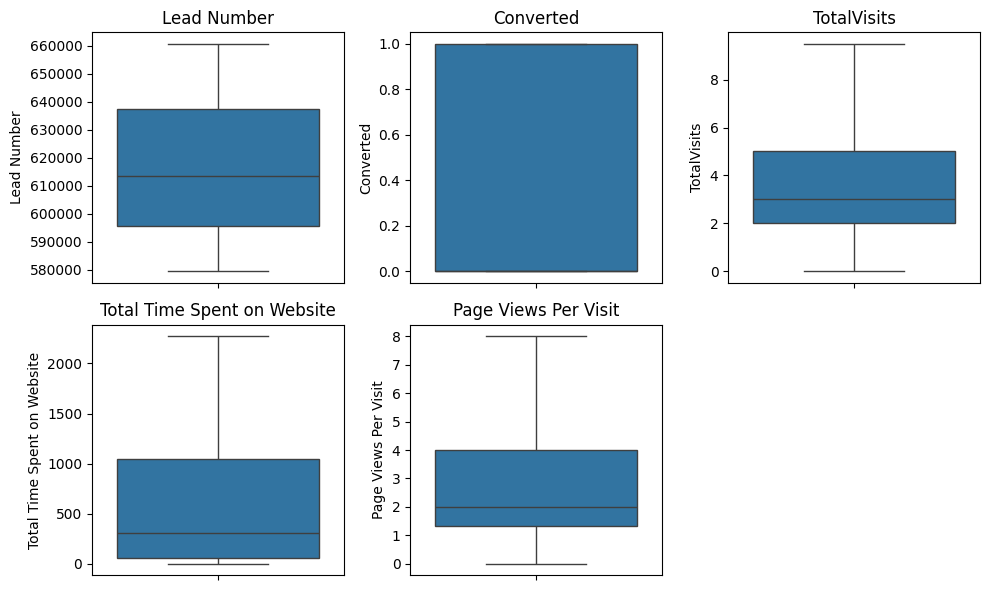

In [27]:
udf_plot_boxplots(df, num_cols=numerical_cols)

## 3.7 Looking at Spelling Errors & Similar String Values

In [28]:
# Checking value_counts for all categorical columns
for col in df[categorical_cols].columns[1:]:
    print(df[col].value_counts())
    print('\n')

Lead Source
Google               1883
Direct Traffic       1823
Organic Search        804
Olark Chat            685
Reference             526
Referral Sites         74
Facebook               40
Welingak Website       39
Click2call              3
bing                    2
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64


Last Activity
Email Opened                    2319
SMS Sent                        1920
Page Visited on Website          410
Olark Chat Conversation          376
Converted to Lead                289
Email Link Clicked               168
Email Bounced                    165
Form Submitted on Website         79
Unreachable                       73
Unsubscribed                      42
Had a Phone Conversation          28
Approached upfront                 9
View in browser link Clicked       3
Email Received                     2
Email Marked

In [29]:
# # Replacing 'google' with 'Google'
# df['Lead Source'] = df['Lead Source'].replace({'google': 'Google'})
# df['Lead Source'].value_counts()

### 3.7.1 Reduce Categories in `Lead Source`

In [30]:
# Categories with less than 50 entries
low_freq_categories = df['Lead Source'].value_counts()[df['Lead Source'].value_counts() < 50].index

# Replacing these with 'Other'
df['Lead Source'] = df['Lead Source'].replace(low_freq_categories, 'Other')

df['Lead Source'].value_counts()

Lead Source
Google            1883
Direct Traffic    1823
Organic Search     804
Olark Chat         685
Reference          526
Other               92
Referral Sites      74
Name: count, dtype: int64

In [31]:
# Checking Lead Origin
df['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    3501
API                        1751
Lead Add Form               595
Lead Import                  40
Name: count, dtype: int64

In [32]:
df.shape

(5887, 16)

# 4. EDA

## 4.1 Target Imbalance

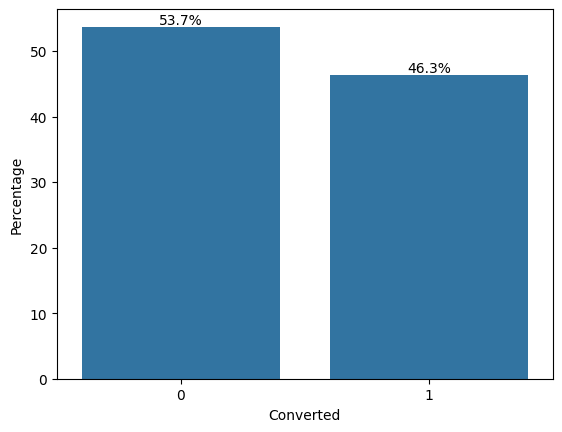

In [33]:
# Calculate percentage for each category in the 'Converted' column
percentage_data = df['Converted'].value_counts(normalize=True) * 100

# Plot barplot
sns.barplot(x=percentage_data.index, y=percentage_data.values)

# Set y-axis to percentage
plt.ylabel('Percentage')

# Annotate bars with percentage values
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


## 4.2 Univariate Analysis - Numerical features

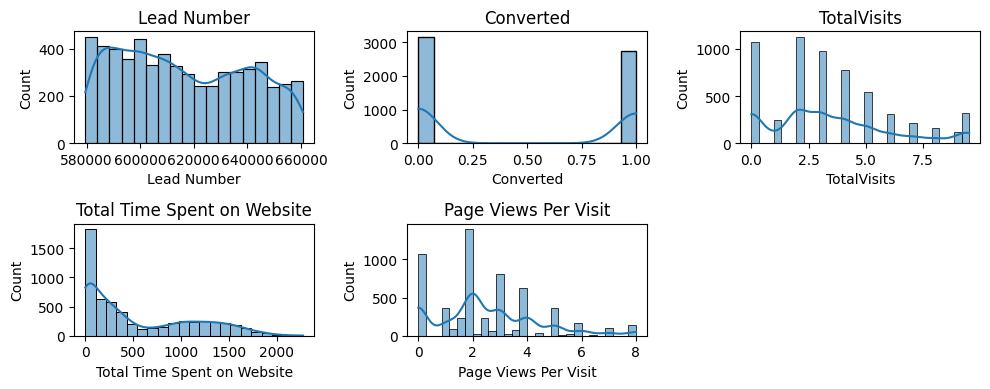

In [34]:
cols = 3

# Calculating the number of rows needed for subplots
rows = math.ceil(len(numerical_cols) / cols)

fig = plt.figure(figsize=(10, 4))

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
    sns.histplot(data=df, x=col, ax=ax, kde=True)
    ax.set_title(f'{col}')

plt.tight_layout()
plt.show()

## 4.3 Univariate Analysis - Categorical Features

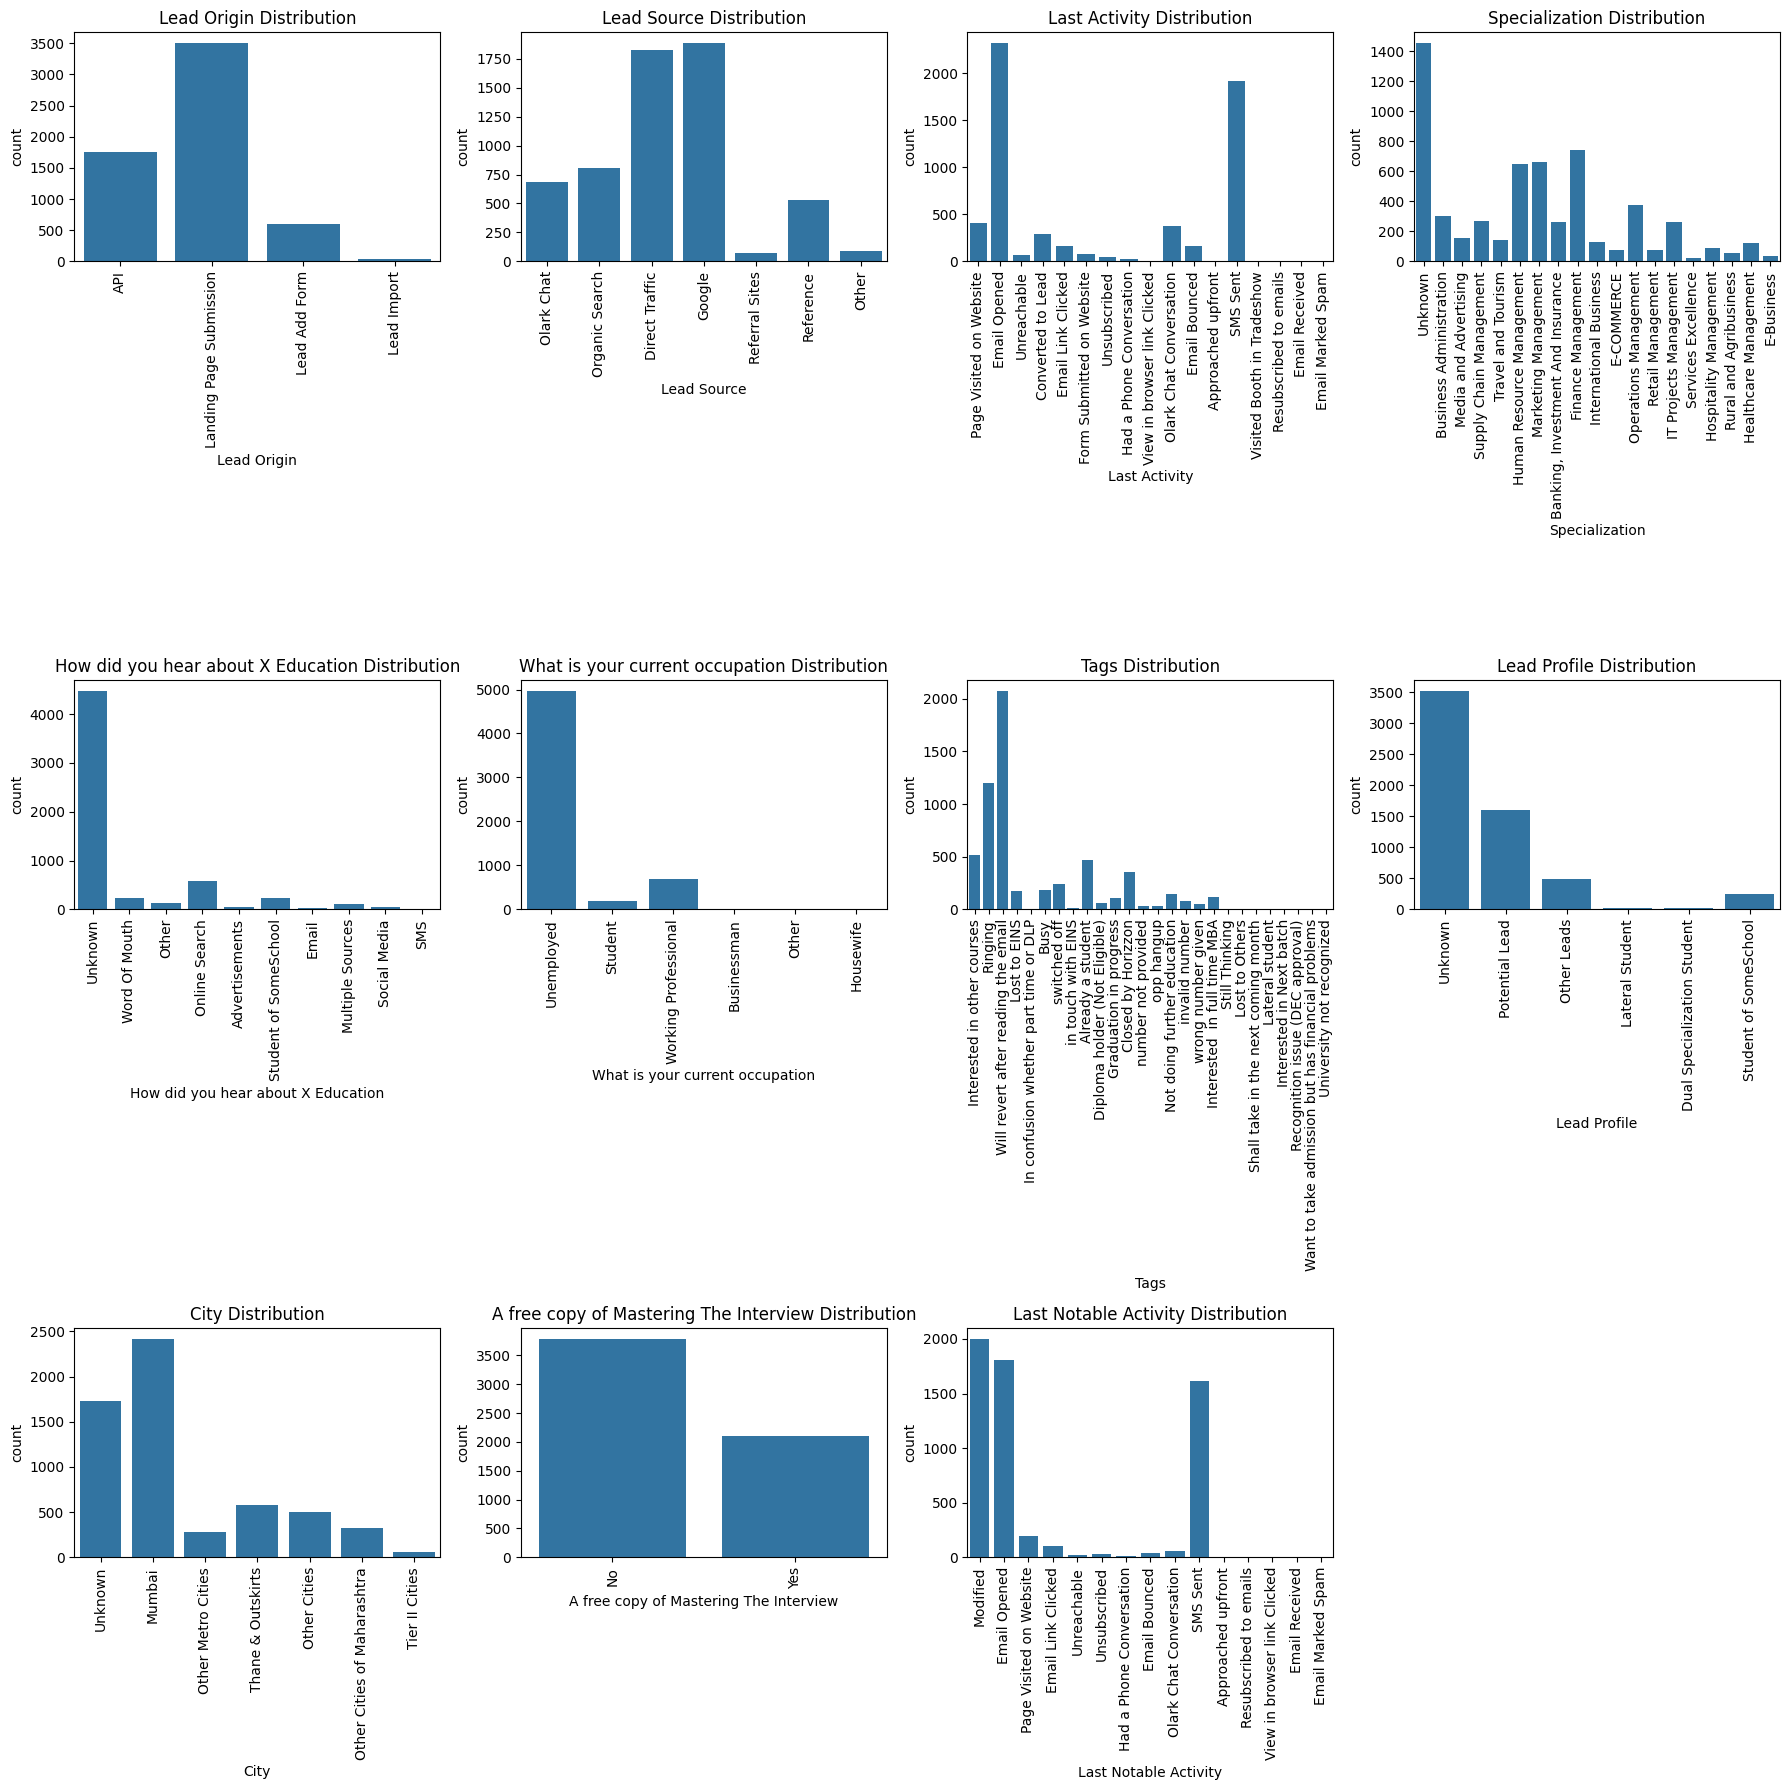

In [35]:
cols = 4

# Calculating the number of rows needed for subplots
rows = math.ceil(len(categorical_cols) / cols)

fig = plt.figure(figsize=(18, 18))

for i, col in enumerate(categorical_cols):
    ax = plt.subplot(rows, cols, i + 1)  # +1 because subplot indices start at 1
    sns.countplot(x=df[col], ax=ax)  # Use x= for vertical bars
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)  # Label the x-axis explicitly
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

## 4.4 Bivariate Analysis - Numerical Features

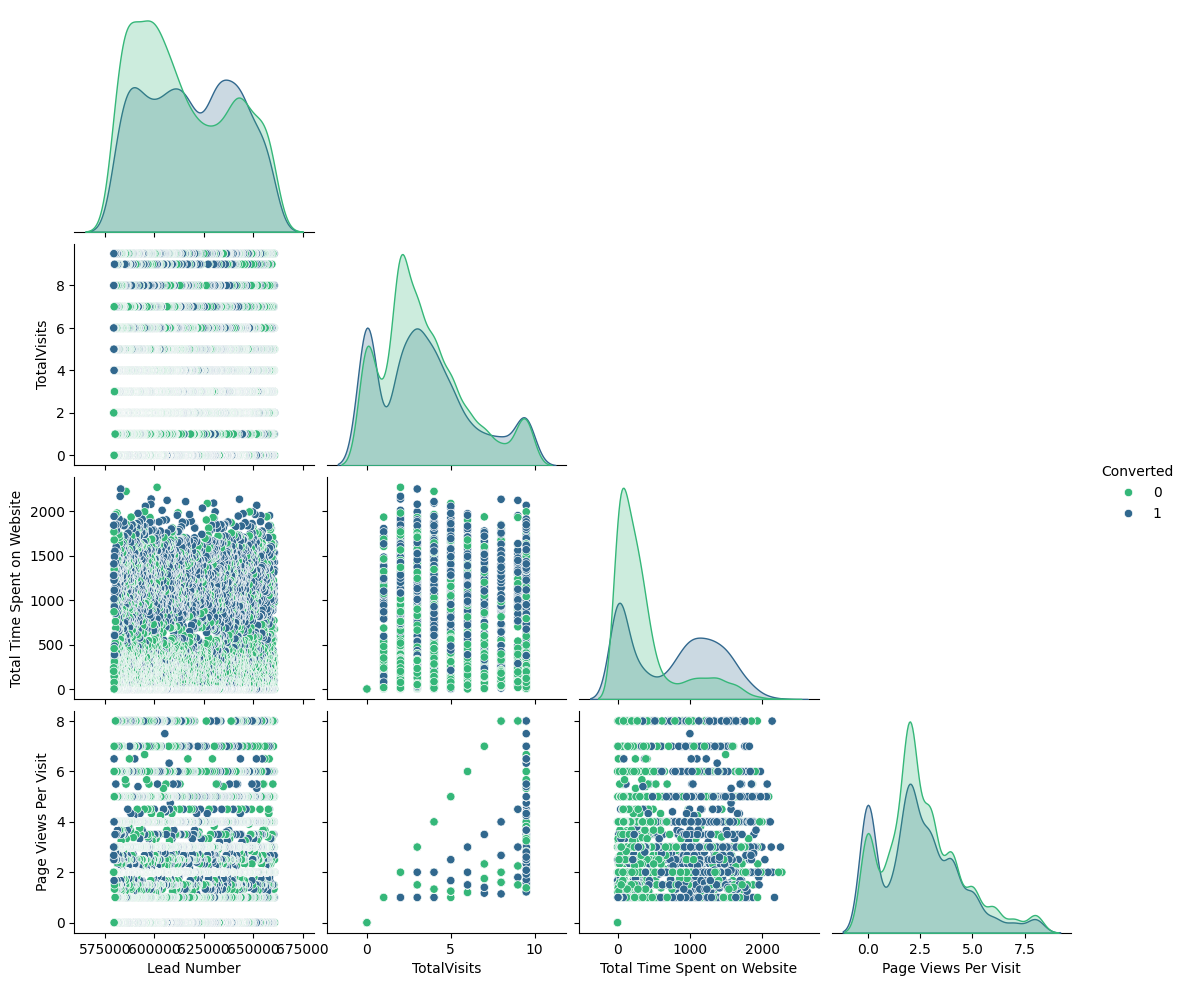

In [36]:
g = sns.pairplot(df[numerical_cols], hue='Converted', palette='viridis_r', corner=True)
g.figure.set_size_inches(12,10)
plt.show()

<Axes: ylabel='Total Time Spent on Website'>

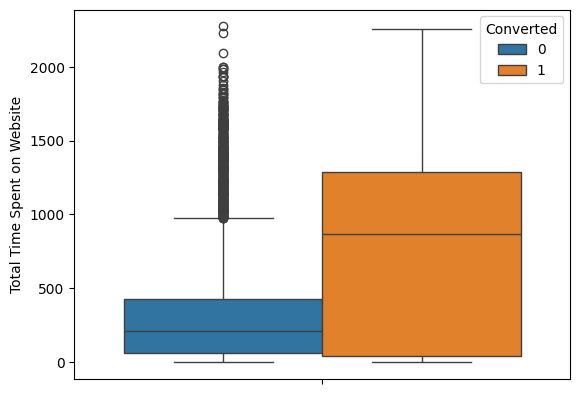

In [37]:
sns.boxplot(data=df, y='Total Time Spent on Website', hue='Converted')

**OBSERVATION**
- The only pair showing somewhat linear relationship is between - `TotalVisits` & `Page Views Per Visit`
- Those who `Converted` to sale spent much more time on the Website

## 4.5 Multivariate Analysis

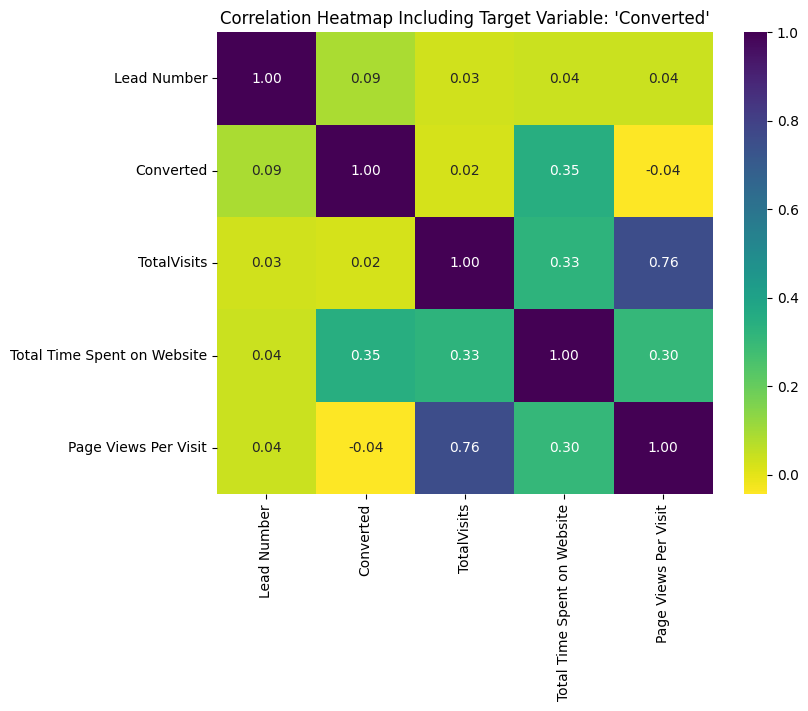

In [38]:
# Calculate correlation matrix including the target variable
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis_r', fmt=".2f")
plt.title("Correlation Heatmap Including Target Variable: 'Converted'")
plt.show()

**OBSERVATIONS**
- A high correlation can be seen between `Page Views Per Visit` & `Total Time Spent on Website`
- A good Correlation can also be seen between `Total Time Spent on Website` & `Converted` 

- This could imply that those who are highly interested to buy an education program visit the website often, or spend more time exploring the programs during their visits.

## 4.6 Correlation Heatmap - Segregated by Target Feature

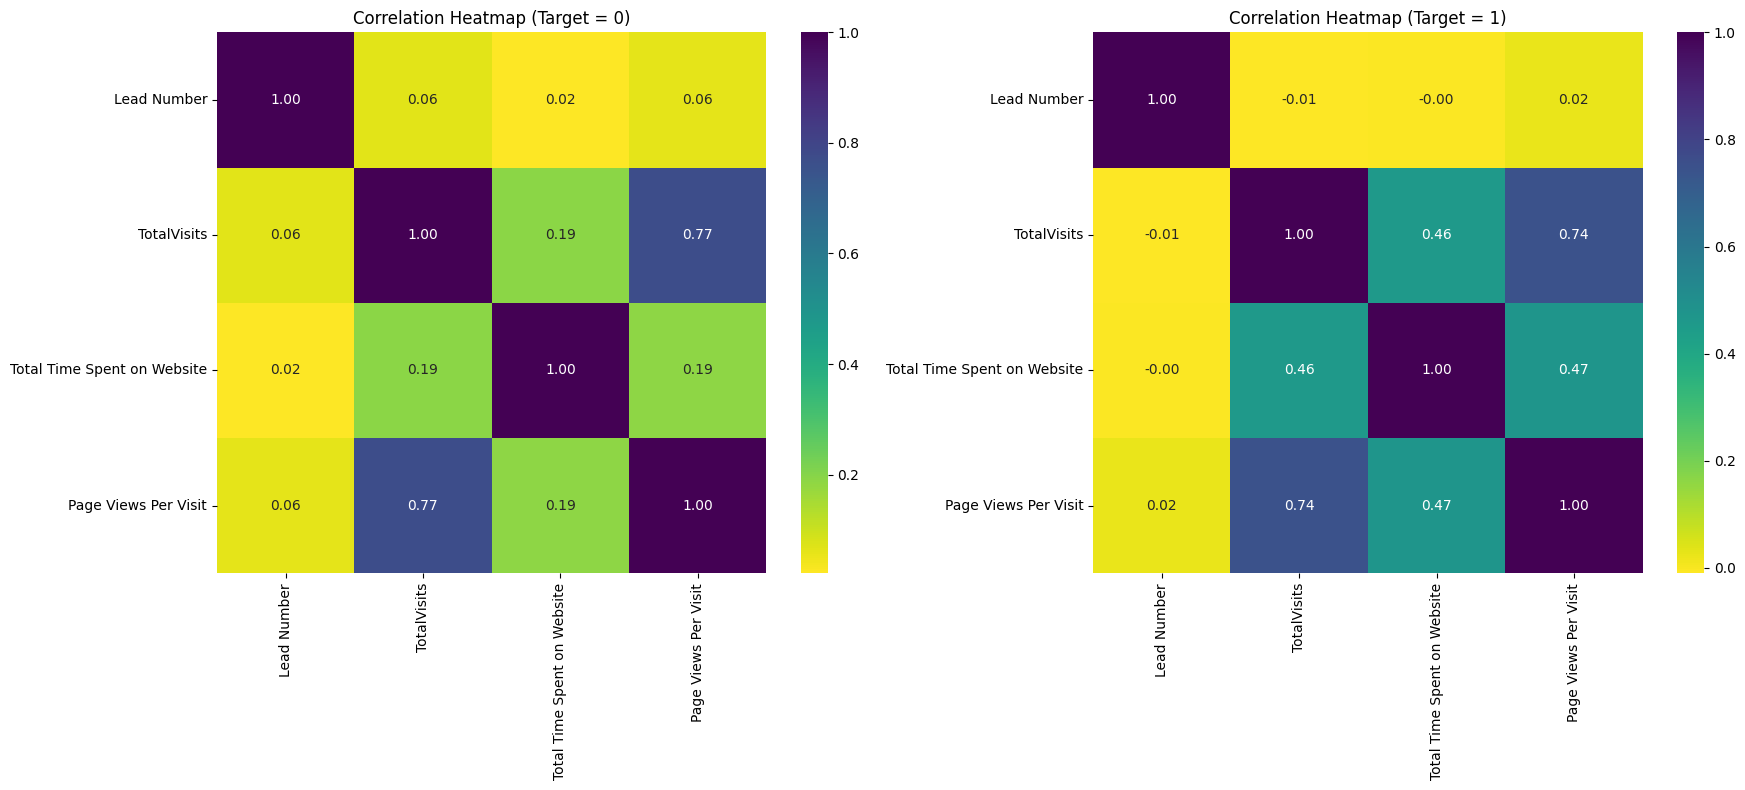

In [39]:
# Segregate dataset based on the target variable
df_target_0 = df[df['Converted'] == 0]  # Filter where target = 0
df_target_1 = df[df['Converted'] == 1]  # Filter where target = 1

# Calculate correlation matrices for each subset, excluding 'Converted'
corr_matrix_0 = df_target_0[numerical_cols].drop(columns=['Converted'], errors='ignore').corr()
corr_matrix_1 = df_target_1[numerical_cols].drop(columns=['Converted'], errors='ignore').corr()

# Plot the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap for target = 0
sns.heatmap(corr_matrix_0, annot=True, cmap='viridis_r', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap (Target = 0)")

# Heatmap for target = 1
sns.heatmap(corr_matrix_1, annot=True, cmap='viridis_r', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap (Target = 1)")

plt.tight_layout()
plt.show()


**OBSERVATION**
- We see that for the `Converted`=1 , successfully Converted leads - there is a higher correlation between -

- - `Total Time Spent on Website` & `Page Views Per Visit` -> 0.52
- - `Total Time Spent on Website` & `TotalVisits` -> 0.47


as compared to non-converted leads.

In [40]:
df.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0        0.000                            0                 0.000   
1        5.000                          674                 2.500   
2        2.000                         1532                 2.000   
3        1.000                          305                 1.000   
4        2.000                         1428                 1.000   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  How did you hear about X Education What is your current occupation  \
0                            Unknown                      Unemployed   
1                            Unknown                      Unemployed   
2                            Unknown                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                                  Tags    Lead Profile     City  \
0          Interested in other courses         Unknown  Unknown   
1                              Ringing         Unknown  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing         Unknown   Mumbai   
4  Will revert after reading the email         Unknown   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [41]:
df.shape

(5887, 16)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5887 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             5887 non-null   int64  
 1   Lead Origin                             5887 non-null   object 
 2   Lead Source                             5887 non-null   object 
 3   Converted                               5887 non-null   int64  
 4   TotalVisits                             5887 non-null   float64
 5   Total Time Spent on Website             5887 non-null   int64  
 6   Page Views Per Visit                    5887 non-null   float64
 7   Last Activity                           5887 non-null   object 
 8   Specialization                          5887 non-null   object 
 9   How did you hear about X Education      5887 non-null   object 
 10  What is your current occupation         5887 non-null   object 
 

In [43]:
categorical_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

# 5. Model Building - Logistic Regression

In [44]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 5.1 One Hot Encoding

In [45]:
# Converting categorical variables into dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [46]:
# Setting `Lead Number` as the DataFrame index
df = df.set_index('Lead Number',drop=True)
numerical_cols.remove('Lead Number')

In [47]:
df.shape

(5887, 112)

In [48]:
df.head()

Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
660737               0        0.000                            0   
660728               0        5.000                          674   
660727               1        2.000                         1532   
660719               0        1.000                          305   
660681               1        2.000                         1428   

             Page Views Per Visit  Lead Origin_Landing Page Submission  \
Lead Number                                                              
660737                      0.000                                    0   
660728                      2.500                                    0   
660727                      2.000                                    1   
660719                      1.000                                    1   
660681                      1.000                                    1   

             Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
Lead Number                                                       
660737                               0                        0   
660728                               0                        0   
660727                               0                        0   
660719                               0                        0   
660681                               0                        0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
660737                        0                       1   
660728                        0                       0   
660727                        0                       0   
660719                        0                       0   
660681                        1                       0   

             Lead Source_Organic Search  Lead Source_Other  \
Lead Number                                                  
660737                                0                  0   
660728                                1                  0   
660727                                0                  0   
660719                                0                  0   
660681                                0                  0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
660737                           0                           0   
660728                           0                           0   
660727                           0                           0   
660719                           0                           0   
660681                           0                           0   

             Last Activity_Converted to Lead  Last Activity_Email Bounced  \
Lead Number                                                                 
660737                                     0                            0   
660728                                     0                            0   
660727                                     0                            0   
660719                                     0                            0   
660681                                     1                            0   

             Last Activity_Email Link Clicked  \
Lead Number                                     
660737                                      0   
660728                                      0   
660727                                      0   
660719                                      0   
660681                                      0   

             Last Activity_Email Marked Spam  Last Activity_Email Opened  \
Lead Number                                                                
660737                                     0                           0   
660728                                     0                           1   
660727                                     0   

### Correlation Heatmap of the Scaled-Dummified Dataframe - Training Features
- We plot a correlation heatmap to check for multi-collinearity

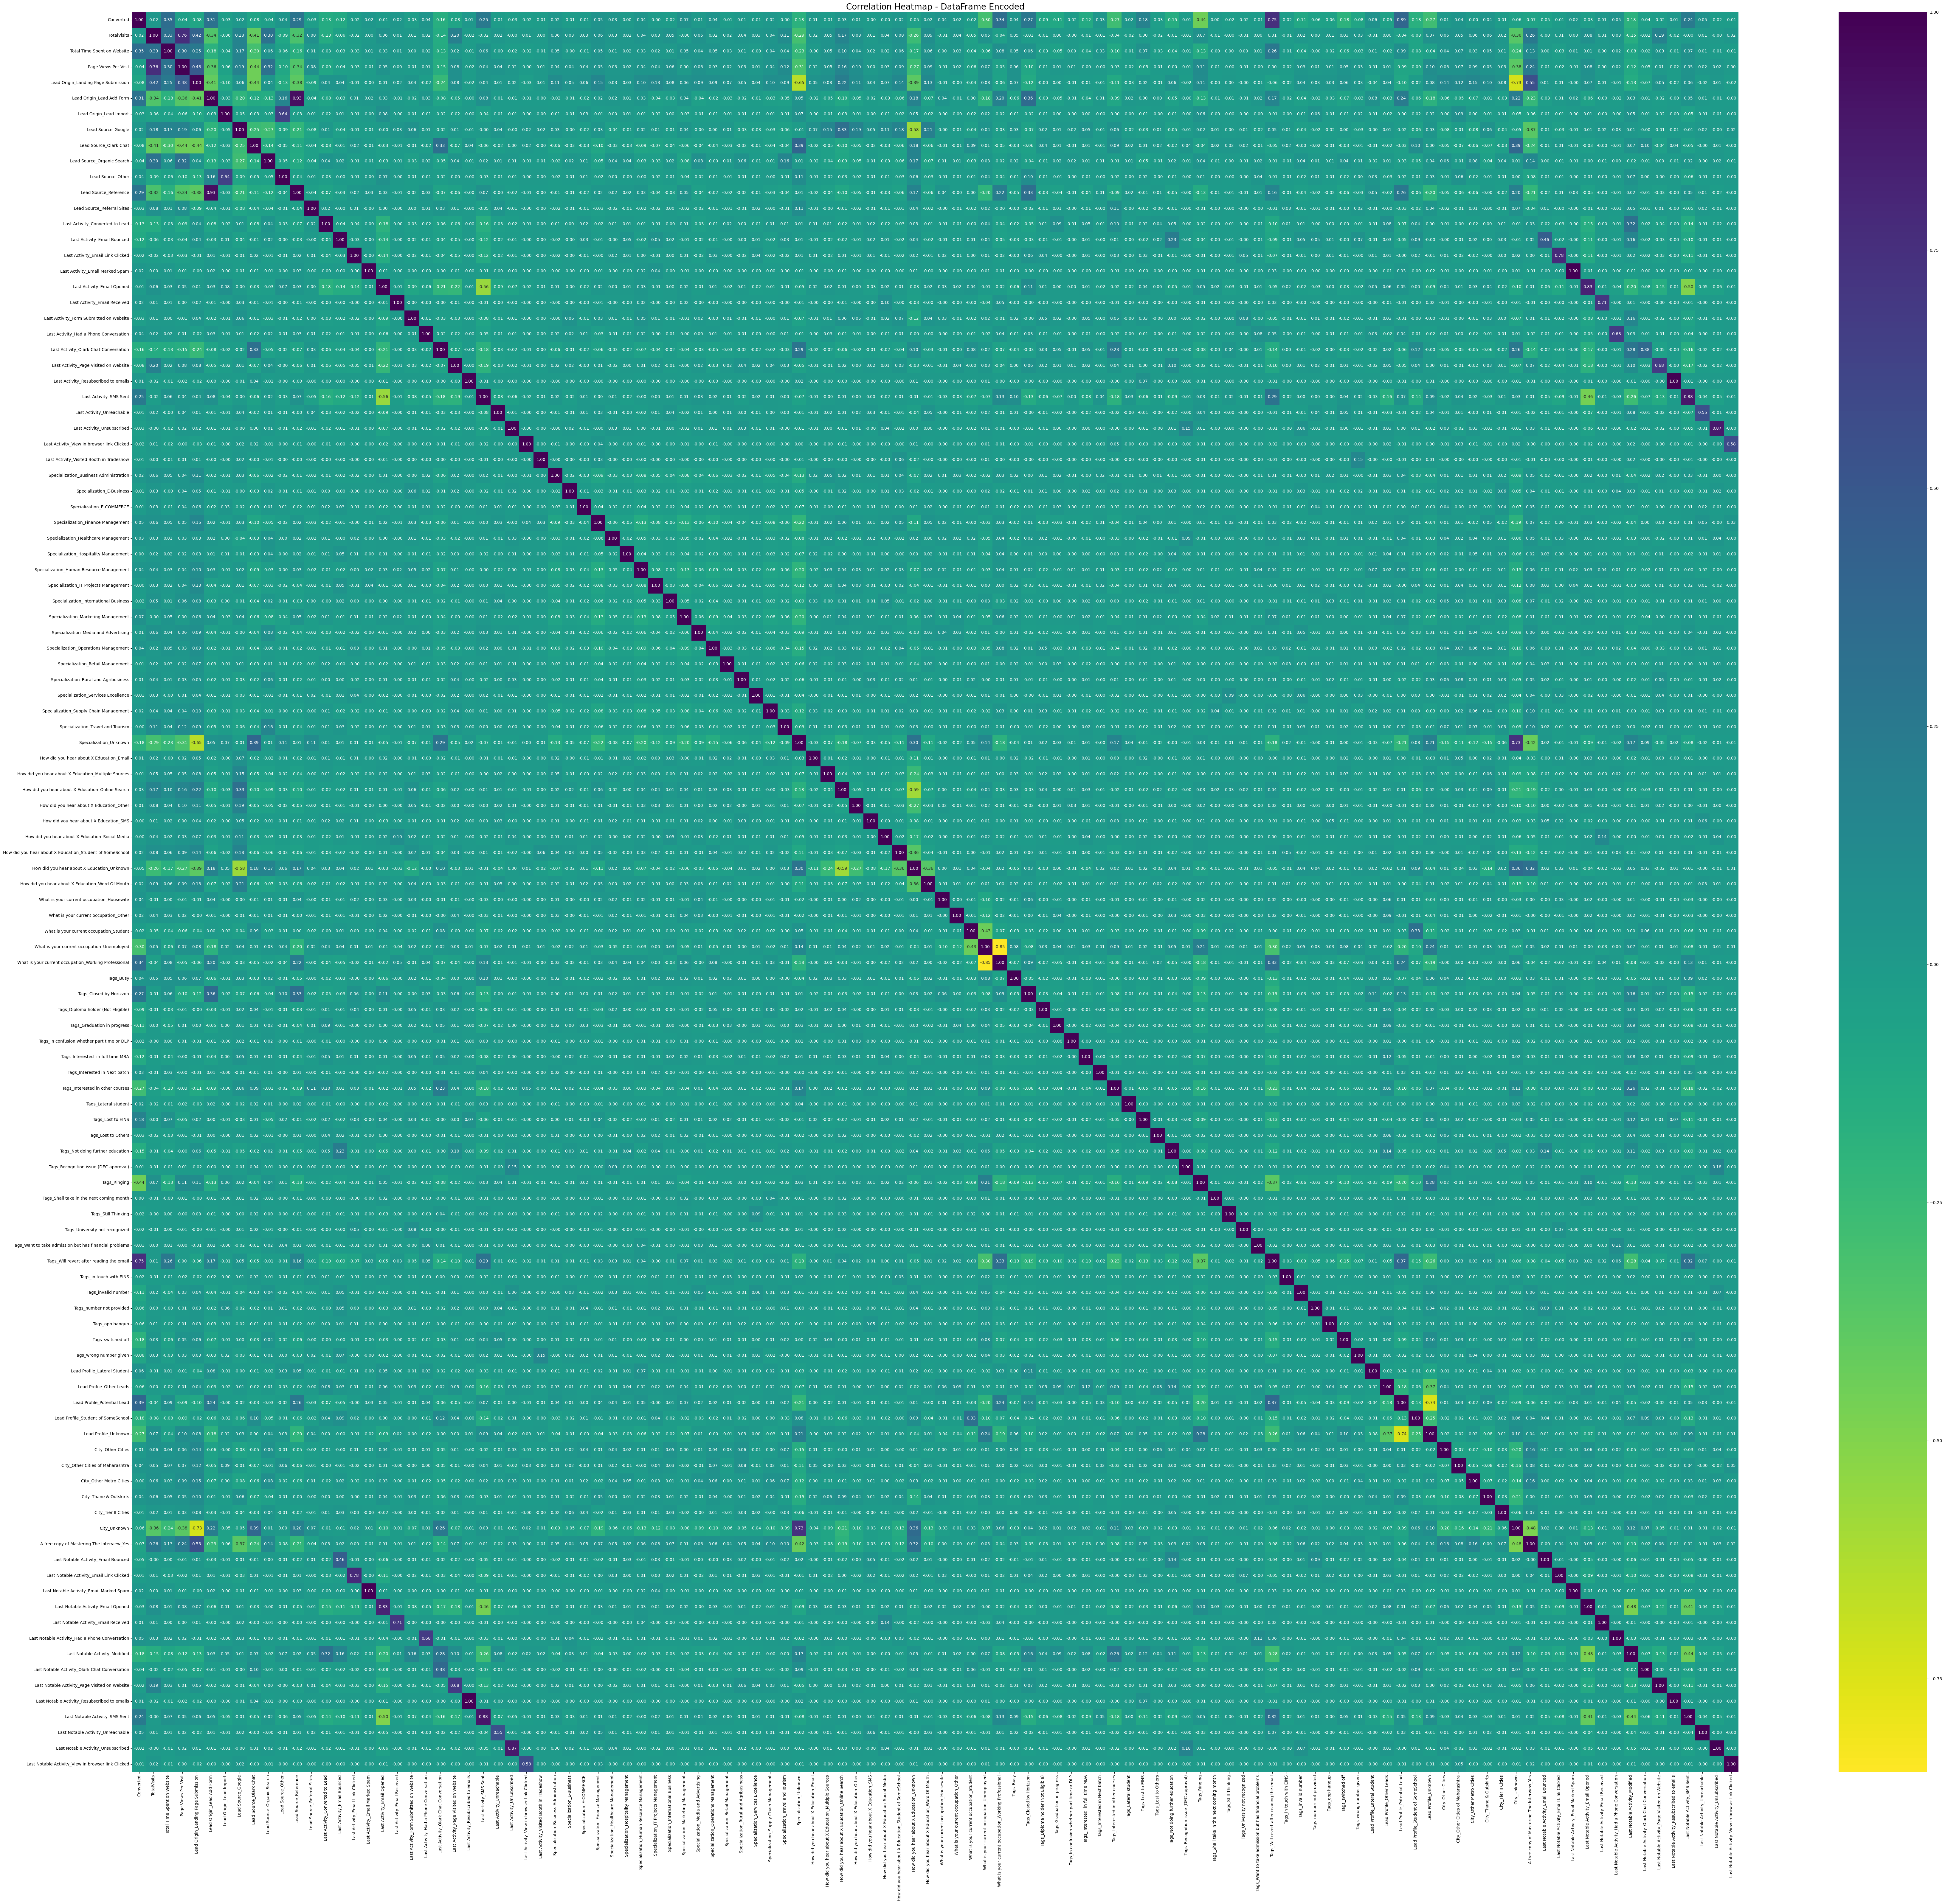

In [49]:
plt.figure(figsize = (72, 64), dpi=100)
sns.heatmap(df.corr(), annot = True, cmap="viridis_r", fmt=".2f")
plt.title('Correlation Heatmap - DataFrame Encoded', fontsize=20)
plt.tight_layout()
plt.show()

**OBSERVATIONS**
- There are too many features with extremely high correlation.
- It is difficult to manually check and drop these high-corr features
- We'll use RFE to reduce the number of features

## 5.2 Train Test Split

In [50]:
# Features (X) and target (y)
X = df.drop(columns='Converted')  # Drop the target column
y = df['Converted']  # Target column

In [51]:
numerical_cols.remove('Converted')
numerical_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [52]:
# Splitting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensions of Train & Test Split
print('Train X Shape:', X_train.shape)
print('Test X Shape:', X_test.shape)
print('Train y Shape:', y_train.shape)
print('Test y Shape:', y_test.shape)

Train X Shape: (4709, 111)
Test X Shape: (1178, 111)
Train y Shape: (4709,)
Test y Shape: (1178,)


In [53]:
# Scaling only numerical columns
scaler = MinMaxScaler()

# Fit and transform numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [54]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                                   
600899             0.316                        0.158                 0.375   
616706             0.526                        0.016                 0.625   
606035             1.000                        0.699                 0.437   
580754             0.421                        0.184                 0.500   
620918             1.000                        0.461                 0.175   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
600899                                         1                          0   
616706                                         1                          0   
606035                                         1                          0   
580754                                         1                          0   
620918                                         1                          0   

             Lead Origin_Lead Import  Lead Source_Google  \
Lead Number                                                
600899                             0                   0   
616706                             0                   0   
606035                             0                   0   
580754                             0                   1   
620918                             0                   0   

             Lead Source_Olark Chat  Lead Source_Organic Search  \
Lead Number                                                       
600899                            0                           0   
616706                            0                           0   
606035                            0                           1   
580754                            0                           0   
620918                            0                           0   

             Lead Source_Other  Lead Source_Reference  \
Lead Number                                             
600899                       0                      0   
616706                       0                      0   
606035                       0                      0   
580754                       0                      0   
620918                       0                      0   

             Lead Source_Referral Sites  Last Activity_Converted to Lead  \
Lead Number                                                                
600899                                0                                0   
616706                                0                                0   
606035                                0                                0   
580754                                0                                0   
620918                                0                                0   

             Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
Lead Number                                                                  
600899                                 0                                 0   
616706                                 0                                 0   
606035                                 0                                 0   
580754                                 0                                 0   
620918                                 0                                 0   

             Last Activity_Email Marked Spam  Last Activity_Email Opened  \
Lead Number                                                                
600899                                     0                           1   
616706                                     0                           0   
606035                                     0                           0   
580754                                     0                           0   
620918                                     0                           0   

 

## 5.3 Recursive Feature Elimination (RFE)

In [55]:
from sklearn.feature_selection import RFE
# Feature Selection with Recursive Feature Elimination

estimator = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Perform RFE to select the top 10 features
selector = RFE(estimator, n_features_to_select=12)
selector = selector.fit(X_train, y_train)

In [56]:
# Get the selected features
selected_features = X_train.columns[selector.support_]
selected_features

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [57]:
def udf_calculate_vif(X):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in the dataset.

    The VIF measures how much the variance of a regression coefficient is inflated due to collinearity with other features. 
    Higher VIFs suggest multicollinearity, where features are highly correlated.

    Parameters:
    X : pandas.DataFrame
        Features dataframe (excluding the target variable).

    Returns:
    pandas.DataFrame
        DataFrame containing the VIF values for each feature, sorted in descending order.
    """
    # Create a dataframe to hold the VIF data
    vif_data = pd.DataFrame()
    
    # Calculate the VIF for each feature
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Sort the VIF values in descending order
    return vif_data.sort_values("VIF", ascending=False)

Subset the `Train`& `Test`dataframes with only `selected_features`from RFE

In [58]:
# Filter selected features from dataframe for model building
X_train = X_train[selected_features]
X_test = X_test[selected_features]

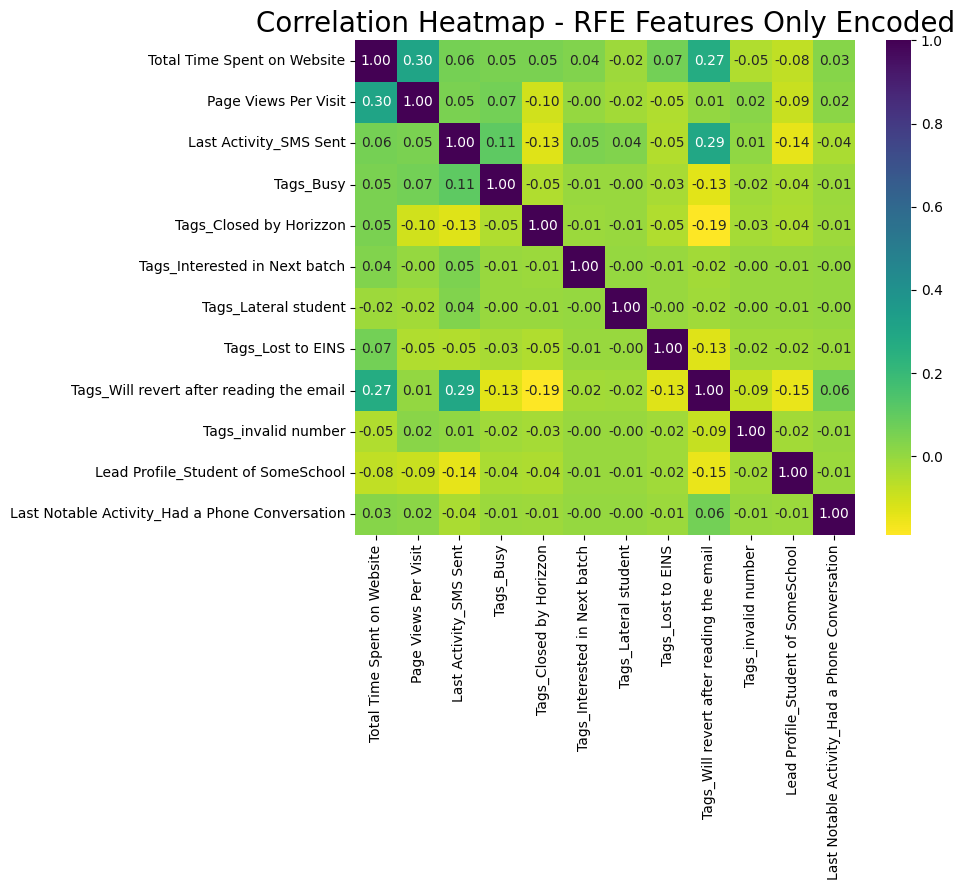

In [59]:
plt.figure(figsize = (10, 9))
sns.heatmap(X_train.corr(),cmap='viridis_r',annot=True, fmt=".2f")
plt.title('Correlation Heatmap - RFE Features Only Encoded', fontsize=20)
plt.tight_layout()
plt.show()

## 5.4 Building Models

### Model 1

In [60]:
# Fit logistic regression model
X_train_sm = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4696
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -554.82
Date:                Tue, 17 Dec 2024   Deviance:                       1109.6
Time:                        22:50:37   Pearson chi2:                 3.99e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6823
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.5539      0.223    -20.427      0.000      -4.991      -4.117
Total Time Spent on Website                        3.5017      0.362      9.665      0.000       2.792       4.212
Page Views Per Visit                              -1.1212      0.385     -2.912      0.004      -1.876      -0.366
Last Activity_SMS Sent                             1.3717      0.183      7.507      0.000       1.014       1.730
Tags_Busy                                          3.4874      0.233     14.942      0.000       3.030       3.945
Tags_Closed by Horizzon                            9.6662      1.019      9.489      0.000       7.670      11.663
Tags_Interested in Next batch                     26.5958   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Tags_Lateral student                              27.5500   7.52e+04      0.000      1.000   -1.47e+05    1.47e+05
Tags_Lost to EINS                                  7.8151      0.635     12.307      0.000       6.571       9.060
Tags_Will revert after reading the email           6.9841      0.212     32.983      0.000       6.569       7.399
Tags_invalid number                              -21.1969   1.51e+04     -0.001      0.999   -2.96e+04    2.95e+04
Lead Profile_Student of SomeSchool                -2.2798      0.916     -2.489      0.013      -4.075      -0.484
Last Notable Activity_Had a Phone Conversation    26.6281   3.53e+04      0.001      0.999   -6.92e+04    6.92e+04
==================================================================================================================
"""

In [61]:
vif = udf_calculate_vif(X_train_sm)
vif

feature   VIF
0                                            const 4.469
9         Tags_Will revert after reading the email 1.380
1                      Total Time Spent on Website 1.265
2                             Page Views Per Visit 1.160
3                           Last Activity_SMS Sent 1.152
5                          Tags_Closed by Horizzon 1.109
4                                        Tags_Busy 1.069
11              Lead Profile_Student of SomeSchool 1.058
8                                Tags_Lost to EINS 1.057
10                             Tags_invalid number 1.016
12  Last Notable Activity_Had a Phone Conversation 1.008
6                    Tags_Interested in Next batch 1.007
7                             Tags_Lateral student 1.003

**OBSERVATIONS**
- There are a few features with very high p-values. 
- We will start with dropping - `Last Notable Activity_Had a Phone Conversation`

In [62]:
X_train = X_train.drop(columns='Last Notable Activity_Had a Phone Conversation')
X_test = X_test.drop(columns='Last Notable Activity_Had a Phone Conversation')

### Model 2

In [63]:
# Build 2nd Model
X_train_sm = sm.add_constant(X_train)
model_2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4697
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -560.13
Date:                Tue, 17 Dec 2024   Deviance:                       1120.3
Time:                        22:50:38   Pearson chi2:                 4.03e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6816
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5266      0.221    -20.469      0.000      -4.960      -4.093
Total Time Spent on Website                  3.4561      0.360      9.611      0.000       2.751       4.161
Page Views Per Visit                        -1.0679      0.383     -2.790      0.005      -1.818      -0.318
Last Activity_SMS Sent                       1.3478      0.182      7.418      0.000       0.992       1.704
Tags_Busy                                    3.4655      0.232     14.932      0.000       3.011       3.920
Tags_Closed by Horizzon                      9.6364      1.018      9.463      0.000       7.640      11.632
Tags_Interested in Next batch               26.5967   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Tags_Lateral student                        27.5464   7.52e+04      0.000      1.000   -1.47e+05    1.47e+05
Tags_Lost to EINS                            7.7862      0.634     12.273      0.000       6.543       9.030
Tags_Will revert after reading the email     6.9688      0.210     33.145      0.000       6.557       7.381
Tags_invalid number                        -21.2031   1.51e+04     -0.001      0.999   -2.97e+04    2.96e+04
Lead Profile_Student of SomeSchool          -2.2941      0.914     -2.511      0.012      -4.085      -0.503
============================================================================================================
"""

In [64]:
vif = udf_calculate_vif(X_train_sm)
vif

feature   VIF
0                                      const 4.469
9   Tags_Will revert after reading the email 1.374
1                Total Time Spent on Website 1.265
2                       Page Views Per Visit 1.159
3                     Last Activity_SMS Sent 1.148
5                    Tags_Closed by Horizzon 1.109
4                                  Tags_Busy 1.069
11        Lead Profile_Student of SomeSchool 1.058
8                          Tags_Lost to EINS 1.057
10                       Tags_invalid number 1.016
6              Tags_Interested in Next batch 1.007
7                       Tags_Lateral student 1.003

**OBSERVATIONS**
- There are a few features with very high p-values. 
- We will drop - `Tags_Lateral student` - and try again.

In [65]:
X_train = X_train.drop(columns='Tags_Lateral student')
X_test = X_test.drop(columns='Tags_Lateral student')

### Model 3

In [66]:
# Build 3rd Model
X_train_sm = sm.add_constant(X_train)
model_3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4698
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -568.97
Date:                Tue, 17 Dec 2024   Deviance:                       1137.9
Time:                        22:50:38   Pearson chi2:                 3.99e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6804
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4552      0.217    -20.525      0.000      -4.881      -4.030
Total Time Spent on Website                  3.3984      0.355      9.570      0.000       2.702       4.094
Page Views Per Visit                        -1.1486      0.380     -3.025      0.002      -1.893      -0.404
Last Activity_SMS Sent                       1.3930      0.181      7.715      0.000       1.039       1.747
Tags_Busy                                    3.4153      0.230     14.828      0.000       2.964       3.867
Tags_Closed by Horizzon                      9.5866      1.018      9.420      0.000       7.592      11.581
Tags_Interested in Next batch               26.5093   5.59e+04      0.000      1.000    -1.1e+05     1.1e+05
Tags_Lost to EINS                            7.7428      0.634     12.215      0.000       6.500       8.985
Tags_Will revert after reading the email     6.9207      0.208     33.273      0.000       6.513       7.328
Tags_invalid number                        -21.2565   1.51e+04     -0.001      0.999   -2.97e+04    2.96e+04
Lead Profile_Student of SomeSchool          -2.3037      0.909     -2.535      0.011      -4.085      -0.523
============================================================================================================
"""

In [67]:
vif = udf_calculate_vif(X_train_sm)
vif

feature   VIF
0                                      const 4.464
8   Tags_Will revert after reading the email 1.372
1                Total Time Spent on Website 1.265
2                       Page Views Per Visit 1.159
3                     Last Activity_SMS Sent 1.145
5                    Tags_Closed by Horizzon 1.109
4                                  Tags_Busy 1.069
10        Lead Profile_Student of SomeSchool 1.058
7                          Tags_Lost to EINS 1.057
9                        Tags_invalid number 1.016
6              Tags_Interested in Next batch 1.007

**OBSERVATIONS**
- There are a few features with very high p-values. 
- We will drop - `Tags_invalid number` - and try again.

In [68]:
X_train = X_train.drop(columns='Tags_invalid number')
X_test = X_test.drop(columns='Tags_invalid number')

### Model 4

In [69]:
# Build 4th Model
X_train_sm = sm.add_constant(X_train)
model_4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4699
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -571.28
Date:                Tue, 17 Dec 2024   Deviance:                       1142.6
Time:                        22:50:38   Pearson chi2:                 4.04e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6801
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4801      0.217    -20.662      0.000      -4.905      -4.055
Total Time Spent on Website                  3.3789      0.353      9.585      0.000       2.688       4.070
Page Views Per Visit                        -1.1315      0.379     -2.988      0.003      -1.874      -0.389
Last Activity_SMS Sent                       1.3776      0.180      7.646      0.000       1.025       1.731
Tags_Busy                                    3.4478      0.230     14.991      0.000       2.997       3.899
Tags_Closed by Horizzon                      9.6114      1.018      9.445      0.000       7.617      11.606
Tags_Interested in Next batch               23.5520   1.25e+04      0.002      0.998   -2.44e+04    2.45e+04
Tags_Lost to EINS                            7.7668      0.634     12.259      0.000       6.525       9.009
Tags_Will revert after reading the email     6.9478      0.208     33.453      0.000       6.541       7.355
Lead Profile_Student of SomeSchool          -2.2965      0.912     -2.517      0.012      -4.084      -0.509
============================================================================================================
"""

In [70]:
vif = udf_calculate_vif(X_train_sm)
vif

feature   VIF
0                                     const 4.420
8  Tags_Will revert after reading the email 1.358
1               Total Time Spent on Website 1.265
2                      Page Views Per Visit 1.158
3                    Last Activity_SMS Sent 1.144
5                   Tags_Closed by Horizzon 1.106
4                                 Tags_Busy 1.067
9        Lead Profile_Student of SomeSchool 1.056
7                         Tags_Lost to EINS 1.055
6             Tags_Interested in Next batch 1.007

**OBSERVATIONS**
- There are a few features with very high p-values. 
- We will drop - `Tags_Interested in Next batch` - and try again.

In [71]:
X_train = X_train.drop(columns='Tags_Interested in Next batch')
X_test = X_test.drop(columns='Tags_Interested in Next batch')

### Model 5

In [72]:
# Build 5th Model
X_train_sm = sm.add_constant(X_train)
model_5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4709
Model:                            GLM   Df Residuals:                     4700
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -580.59
Date:                Tue, 17 Dec 2024   Deviance:                       1161.2
Time:                        22:50:38   Pearson chi2:                 4.05e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6788
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4580      0.215    -20.777      0.000      -4.879      -4.037
Total Time Spent on Website                  3.4602      0.347      9.966      0.000       2.780       4.141
Page Views Per Visit                        -1.1929      0.375     -3.177      0.001      -1.929      -0.457
Last Activity_SMS Sent                       1.4433      0.179      8.076      0.000       1.093       1.794
Tags_Busy                                    3.3894      0.229     14.799      0.000       2.940       3.838
Tags_Closed by Horizzon                      9.5875      1.017      9.423      0.000       7.593      11.582
Tags_Lost to EINS                            7.7425      0.634     12.214      0.000       6.500       8.985
Tags_Will revert after reading the email     6.9136      0.207     33.392      0.000       6.508       7.319
Lead Profile_Student of SomeSchool          -2.3014      0.907     -2.537      0.011      -4.080      -0.523
============================================================================================================
"""

In [73]:
vif = udf_calculate_vif(X_train_sm)
vif

feature   VIF
0                                     const 4.420
7  Tags_Will revert after reading the email 1.353
1               Total Time Spent on Website 1.261
2                      Page Views Per Visit 1.158
3                    Last Activity_SMS Sent 1.140
5                   Tags_Closed by Horizzon 1.106
4                                 Tags_Busy 1.066
8        Lead Profile_Student of SomeSchool 1.056
6                         Tags_Lost to EINS 1.055

**OBSERVATIONS**
- Everything looks good here

- - All p-values within acceptable limits
- - All VIF values below 5

### Final Model
Saving `model_5` as the final model for prediction and evaluation

In [74]:
final_model = model_5

### Add a constant to the test set for evaluation

In [75]:
X_test_sm = sm.add_constant(X_test)

# 6. Model Evaluation

- Since p-values and VIFs seem good, we can proceed with making predictions with the latest stable model.
- We'll first test with threshold of 0.5, before checking with optimal threshold

## Quick Metrics Comparison - Training vs Test
We do a quick comparison of the Metrics before a deep-dive.

In [76]:
# Predictions on Training Data
y_train_pred = final_model.predict(X_train_sm)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Predictions on Test Data
y_test_pred = final_model.predict(X_test_sm)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Print Training Performance
print("Training Performance:")
print(classification_report(y_train, y_train_pred_binary))
print("Confusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred_binary))

print('-'*50)

# Print Test Performance
print("Test Performance:")
print(classification_report(y_test, y_test_pred_binary))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred_binary))

Training Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2502
           1       0.96      0.96      0.96      2207

    accuracy                           0.96      4709
   macro avg       0.96      0.96      0.96      4709
weighted avg       0.96      0.96      0.96      4709

Confusion Matrix (Training):
[[2416   86]
 [  90 2117]]
--------------------------------------------------
Test Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       660
           1       0.95      0.97      0.96       518

    accuracy                           0.97      1178
   macro avg       0.96      0.97      0.96      1178
weighted avg       0.97      0.97      0.97      1178

Confusion Matrix (Test):
[[636  24]
 [ 17 501]]


## 6.1 Cross Validation Scores on Training Dataset

In [77]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Initialize Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define logistic regression model
log_reg = LogisticRegression(max_iter=10000, random_state=42)

# Cross-Validation with Stratified K-Fold
cv_scores = cross_val_score(log_reg, X_train_sm, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 2 * 100:.2f}%)")

Cross-Validation Scores: [0.96178344 0.96496815 0.95329087 0.96815287 0.95855473]
Mean CV Accuracy: 96.14% (+/- 1.03%)


## 6.2 New DataFrame for Predictions - Training Set

In [78]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = final_model.predict(X_train_sm)
y_train_pred[:10]

Lead Number
600899   0.013
616706   0.961
606035   0.997
580754   0.049
620918   0.044
615069   0.980
628273   0.997
588844   0.989
657183   0.015
590414   0.016
dtype: float64

In [79]:
y_train_pred_df = pd.DataFrame({'Lead Number':y_train_pred.index,'Converted':y_train.values,'Conversion_Prob':y_train_pred.values})
y_train_pred_df.head()

Lead Number  Converted  Conversion_Prob
0       600899          0            0.013
1       616706          1            0.961
2       606035          1            0.997
3       580754          0            0.049
4       620918          0            0.044

### Creating new column 'Predicted' with 1 if Pred_Prob > 0.5 else 0

In [80]:
y_train_pred_df['Predicted'] = y_train_pred_df['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

Lead Number  Converted  Conversion_Prob  Predicted
0       600899          0            0.013          0
1       616706          1            0.961          1
2       606035          1            0.997          1
3       580754          0            0.049          0
4       620918          0            0.044          0

## 6.3 Evaluation Metrics

### Classification Report & Confusion Matrix - Train Set

In [ ]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Print Training Performance
print("Training Performance:")
classification_report = metrics.classification_report(y_train_pred_df['Converted'], y_train_pred_df['Predicted'])
print(classification_report)

print("Confusion Matrix (Training):")
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Predicted'])
print(confusion_matrix)

Training Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2502
           1       0.96      0.96      0.96      2207

    accuracy                           0.96      4709
   macro avg       0.96      0.96      0.96      4709
weighted avg       0.96      0.96      0.96      4709

Confusion Matrix (Training):
[[2416   86]
 [  90 2117]]


### Accuracy

In [82]:
round(metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted']), 4)

0.9626

### Other Evaluation Metrics

In [83]:
# Let's evaluate the other metrics as well

TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Sensitivity : (Recall)

In [84]:
round(TP/(TP+FN), 4)

0.9592

### Specificity

In [85]:
round(TN/(TN+FP), 4)

0.9656

### False Postive Rate : (1 - Specificity)

In [86]:
# Predicting conversion when customer doesn't convert
round(FP/ (TN+FP), 4)

0.0344

### Positive predictive value : (Precision)

In [87]:
round(TP / (TP+FP), 4)

0.961

### Negative predictive value

In [88]:
round(TN / (TN+ FN), 4)

0.9641

## 6.4 Plot ROC AUC

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def udf_plot_roc_auc(y_actual, y_pred_prob):
    """
    Calculate and plot the ROC curve and AUC for a classification model.

    Parameters:
    -----------
    y_actual : array-like
        Actual labels (0 or 1) from the dataset.
    y_pred_prob : array-like
        Predicted probabilities for the positive class (1).

    Returns:
    --------
    roc_auc : float
        AUC value showing how well the model distinguishes classes.
    """
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_actual, y_pred_prob, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    return None

Training Performance:


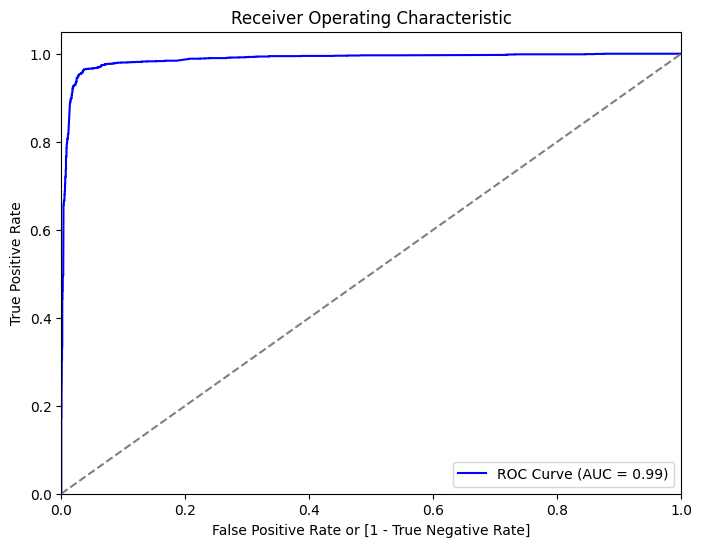

In [90]:
print("Training Performance:")
udf_plot_roc_auc(y_train_pred_df['Converted'], y_train_pred_df['Conversion_Prob'])

**OBSERVATIONS**
- The ROC curve with an AUC of 0.99 indicates that the logistic regression model is performing exceptionally well. 
- This means the model is highly accurate in distinguishing between positive and negative classes. It has a strong ability to correctly classify instances into their respective categories.

#### For above evaluation, we chose a threshold value of 0.5. Below we'll try to find the optimal threshold value.

## 6.5 Finding Optimal Cutoff probability

In [91]:
# Columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df['Conversion_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600899           0             0.013           0      1      0   
1        616706           1             0.961           1      1      1   
2        606035           1             0.997           1      1      1   
3        580754           0             0.049           0      1      0   
4        620918           0             0.044           0      1      0   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900  
0      0      0      0      0      0      0      0      0  
1      1      1      1      1      1      1      1      1  
2      1      1      1      1      1      1      1      1  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0

### 6.5.1 Probabilty, Accuracy, Sensitivity, and Specificity at different cut-offs

In [92]:
# Creating dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

       probability  accuracy  sensitivity  specificity
0.000        0.000     0.469        1.000        0.000
0.100        0.100     0.944        0.979        0.913
0.200        0.200     0.954        0.969        0.941
0.300        0.300     0.962        0.966        0.958
0.400        0.400     0.964        0.964        0.963
0.500        0.500     0.963        0.959        0.966
0.600        0.600     0.962        0.951        0.972
0.700        0.700     0.961        0.945        0.974
0.800        0.800     0.959        0.940        0.975
0.900        0.900     0.949        0.911        0.982


### 6.5.2 Visualisation of above Metrics

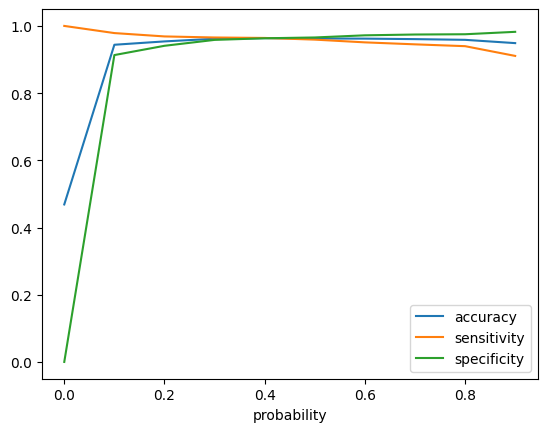

In [93]:
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

From above plot, we can see that all 3 curves intersect at about 0.4

### Adding a Prediction based on Accuracy-Sensitivity-Specificity

In [94]:
y_train_pred_df['Predicted_ass'] = y_train_pred_df['Conversion_Prob'].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_df.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600899           0             0.013           0      1      0   
1        616706           1             0.961           1      1      1   
2        606035           1             0.997           1      1      1   
3        580754           0             0.049           0      1      0   
4        620918           0             0.044           0      1      0   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900   Predicted_ass  
0      0      0      0      0      0      0      0      0               0  
1      1      1      1      1      1      1      1      1               1  
2      1      1      1      1      1      1      1      1               1  
3      0      0      0      0      0      0      0      0               0  
4      0      0      0      0      0      0      0      0               0

In [95]:
round(metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted_ass']), 4)

0.9637

### 6.5.3 Precision & Recall Tradeoff

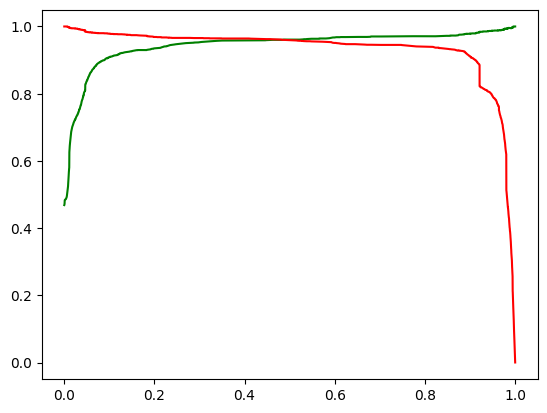

In [96]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_df['Converted'], y_train_pred_df['Conversion_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- From above Precision-Recall curve, we can see that the optimal cut-off is around 0.45

### Adding a Prediction based on Precision-Recall

In [97]:
y_train_pred_df['Predicted_pr'] = y_train_pred_df['Conversion_Prob'].map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_df.head()

Lead Number   Converted   Conversion_Prob   Predicted  0.000  0.100  \
0        600899           0             0.013           0      1      0   
1        616706           1             0.961           1      1      1   
2        606035           1             0.997           1      1      1   
3        580754           0             0.049           0      1      0   
4        620918           0             0.044           0      1      0   

   0.200  0.300  0.400  0.500  0.600  0.700  0.800  0.900   Predicted_ass  \
0      0      0      0      0      0      0      0      0               0   
1      1      1      1      1      1      1      1      1               1   
2      1      1      1      1      1      1      1      1               1   
3      0      0      0      0      0      0      0      0               0   
4      0      0      0      0      0      0      0      0               0   

    Predicted_pr  
0              0  
1              1  
2              1  
3              0  
4              0

In [98]:
round(metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Predicted_pr']), 4)

0.9635

- In the Training Set, We don't see a considerable difference in Accuracy when using optimal A-S-S or P-R curve cutoffs

**OBSERVATIONS**
- The area under curve for ROC Curve = 0.99 which is extremely good.
- Accuracy:        0.9626
- Sensitivity:      0.9592
- Specificity:      0.9656
- Accuracy-Sensitivity-Specificity curves intersect around 0.4
- Precision-Recall curves intersect around 0.45
- No difference in Accuracy whether using A-S-S or P-R optimal threshold

# 7. Predictions on Test Set

In [99]:
y_test_pred = final_model.predict(X_test_sm)
y_test_pred

Lead Number
584655   0.023
596539   0.050
657390   0.010
609020   0.991
596303   0.989
          ... 
582634   0.168
626815   0.117
655723   0.014
608912   0.012
634484   0.100
Length: 1178, dtype: float64

## 7.1 New DataFrame for Predictions - Test Set

In [100]:
y_test_pred_df = pd.DataFrame({'Lead Number': y_test.index, 'Converted': y_test.values,
                              'Conversion_Prob': y_test_pred.values})
y_test_pred_df.head()

Lead Number  Converted  Conversion_Prob
0       584655          0            0.023
1       596539          0            0.050
2       657390          0            0.010
3       609020          1            0.991
4       596303          1            0.989

### Using 0.4 as cut-off based on Accuracy-Sensitivity-Specificity Curve

In [101]:
y_test_pred_df['Predicted_ass'] = y_test_pred_df['Conversion_Prob'].map(lambda x : 1 if x > 0.4 else 0)
y_test_pred_df.head()

Lead Number  Converted  Conversion_Prob  Predicted_ass
0       584655          0            0.023              0
1       596539          0            0.050              0
2       657390          0            0.010              0
3       609020          1            0.991              1
4       596303          1            0.989              1

### Using 0.45 as optimal cut-off based on Precision-Recall Curve

In [102]:
y_test_pred_df['Predicted_pr'] = y_test_pred_df['Conversion_Prob'].map(lambda x : 1 if x > 0.45 else 0)
y_test_pred_df.head()

Lead Number  Converted  Conversion_Prob  Predicted_ass  Predicted_pr
0       584655          0            0.023              0             0
1       596539          0            0.050              0             0
2       657390          0            0.010              0             0
3       609020          1            0.991              1             1
4       596303          1            0.989              1             1

In [103]:
print('Accuracy-Sensitivity-Specificity Cut-off: ')
acc_score_test = round(metrics.accuracy_score(y_test_pred_df['Converted'], y_test_pred_df['Predicted_ass']),4)
acc_score_test

Accuracy-Sensitivity-Specificity Cut-off: 


0.9669

In [104]:
print('Precision-Recall Cut-off: ')
acc_score_test = round(metrics.accuracy_score(y_test_pred_df['Converted'], y_test_pred_df['Predicted_pr']),4)
acc_score_test

Precision-Recall Cut-off: 


0.966

**OBSERVATIONS**
- Using Accuracy-Sensitivity-Specificit Curve's Optimal Cut-off gives us a slightly better Accuracy.
- So, we'll be using `Predicted_ass`

## 7.2 Evaluation Metrics

### Classification Report & Confusion Matrix - Test Set

In [105]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Print Training Performance
print("Testing Performance:")
classification_report = metrics.classification_report(y_test_pred_df['Converted'], y_test_pred_df['Predicted_ass'])
print(classification_report)

print("Confusion Matrix (Testing):")
confusion_matrix = metrics.confusion_matrix(y_test_pred_df['Converted'], y_test_pred_df['Predicted_ass'])
print(confusion_matrix)

Testing Performance:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       660
           1       0.95      0.97      0.96       518

    accuracy                           0.97      1178
   macro avg       0.97      0.97      0.97      1178
weighted avg       0.97      0.97      0.97      1178

Confusion Matrix (Testing):
[[635  25]
 [ 14 504]]


### Accuracy

In [106]:
round(metrics.accuracy_score(y_test_pred_df['Converted'], y_test_pred_df['Predicted_ass']),4)

0.9669

In [107]:
# Let's evaluate the other metrics as well

TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Sensitivity : (Recall)

In [108]:
round(TP/(TP+FN), 4)

0.973

### Specificity

In [109]:
round(TN/(TN+FP), 4)

0.9621

### False Postive Rate : (1 - Specificity)

In [110]:
# Predicting conversion when customer doesn't convert
round(FP/ (TN+FP), 4)

0.0379

### Positive predictive value : (Precision)

In [111]:
round(TP / (TP+FP), 4)

0.9527

### Negative predictive value

In [112]:
round(TN / (TN+ FN), 4)

0.9784

In [113]:
y_test_pred_df.head()

Lead Number  Converted  Conversion_Prob  Predicted_ass  Predicted_pr
0       584655          0            0.023              0             0
1       596539          0            0.050              0             0
2       657390          0            0.010              0             0
3       609020          1            0.991              1             1
4       596303          1            0.989              1             1

Testing Performance:


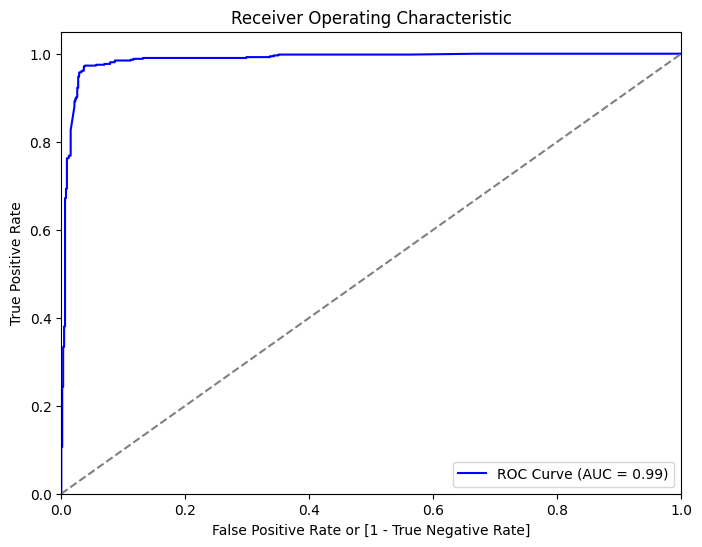

In [114]:
# Plot ROC AUC for Test Data
print("Testing Performance:")
udf_plot_roc_auc(y_test_pred_df['Converted'], y_test_pred_df['Conversion_Prob'])

# 8. Lead Score Generation

## 8.1 Combining Train & Test Set

In [115]:
y_train_pred_df = y_train_pred_df[['Lead Number', 'Conversion_Prob']]
y_test_pred_df = y_test_pred_df[['Lead Number', 'Conversion_Prob']]

In [116]:
y_lead_score = pd.concat([y_train_pred_df, y_test_pred_df], axis=0)
y_lead_score.head()

Lead Number  Conversion_Prob
0       600899            0.013
1       616706            0.961
2       606035            0.997
3       580754            0.049
4       620918            0.044

In [117]:
y_train_pred_df.shape, y_test_pred_df.shape, y_lead_score.shape

((4709, 2), (1178, 2), (5887, 2))

## 8.2 Assigning Lead Score

In [ ]:
y_lead_score['Lead Score'] = y_lead_score['Conversion_Prob'].map(lambda x: round(x*100))
y_lead_score.head()

Lead Number  Conversion_Prob  Lead Score
0       600899            0.013           1
1       616706            0.961          96
2       606035            0.997         100
3       580754            0.049           5
4       620918            0.044           4

In [119]:
# Add Priority based on Lead Score conditions
def assign_priority(score):
    if score > 80:
        return 'Very High'
    elif score > 60:
        return 'High'
    elif score > 40:
        return 'Medium'
    else:
        return 'Low'

In [120]:
y_lead_score['Priority'] = y_lead_score['Lead Score'].apply(assign_priority)
y_lead_score.head()

Lead Number  Conversion_Prob  Lead Score   Priority
0       600899            0.013           1        Low
1       616706            0.961          96  Very High
2       606035            0.997         100  Very High
3       580754            0.049           5        Low
4       620918            0.044           4        Low

# 9. Findings & Recommendations
In this comprehensive lead conversion predictive modeling project, we successfully developed a robust logistic regression model that demonstrates exceptional performance in predicting customer conversions. By employing advanced feature selection techniques like Recursive Feature Elimination (RFE) and carefully managing multicollinearity, we created a highly accurate predictive model with strong generalization capabilities across both training and test datasets.

The model's performance metrics reveal impressive predictive power, with key evaluation indicators showcasing its reliability and effectiveness in identifying potential lead conversions.

---

## 9.1 Key Findings:
- **Overall Accuracy**: 96.14% (Mean CV Accuracy) on the training set, with consistent performance on the test set
- **ROC AUC Score**: 0.99, indicating excellent discrimination between converted and non-converted leads
- **High Sensitivity (Recall)**: 95.92%, demonstrating strong ability to identify actual conversions
- **High Specificity**: 96.56%, showing robust performance in correctly identifying non-converting leads
- **Optimal Probability Threshold**: Identified at 0.4 using Accuracy-Sensitivity-Specificity curve analysis
- **Feature Significance**: Successfully reduced feature set while maintaining high predictive performance

---

## 9.2 Recommendations: 

1. **Operationalize Predictive Insights:**  
   - Use the model's output to assign lead scores, enabling the sales and marketing teams to prioritize high-probability leads effectively.  

2. **Periodic Model Validation:**  
   - Continuously retrain the model with updated data to ensure its performance remains aligned with evolving customer behaviors and market trends.  

3. **Optimize Campaign Strategies:**  
   - Focus marketing and engagement efforts on activities or segments associated with high conversion probabilities as identified by the model.  

4. **Monitor Key Metrics:**  
   - Conduct regular evaluations of the model’s sensitivity, specificity, and accuracy to ensure consistent performance.  

5. **Iterate and Enhance:**  
   - Explore additional features, such as external data sources or behavioral metrics, to further refine the model’s predictive capabilities.  

6. **Strategic Use of Thresholds:**  
   - Adjust the probability threshold based on specific business goals, such as increasing conversion rates or minimizing false negatives, to optimize resource allocation.  
